# Pandas 시각화 - PiePlot, ScatterPlot

DataFrame은 내부적으로 `pyplot` 객체를 초기화고 있기 때문에 이를 활용하여 그래프를 직접 표시할 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [7]:
import sys
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import numpy as np

### [2] 그래프 전역 설정

In [8]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

## #02. 파이 그래프

### [1] 데이터 가져오기

#### (1) 데이터프레임 생성

In [11]:
df = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/04.데이터시각화/수업/수업데이터/city_people.xlsx')
df

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


#### (2) 데이터 전처리

도시별 평균 인구수를 구한다.

In [12]:
df_mean = df[['도시','인구']].groupby('도시').mean()
df_mean

,인구
도시,
부산,3.451492e+06
서울,9.766113e+06
인천,2.761243e+06


### [2] 파이 그래프 시각화

파이 그래프의 경우 반드시 데이터 프레임 안에서 특정 변수를 지정해야 한다.

데이터 프레임의 index가 파이 그래프의 각 조각이 된다.

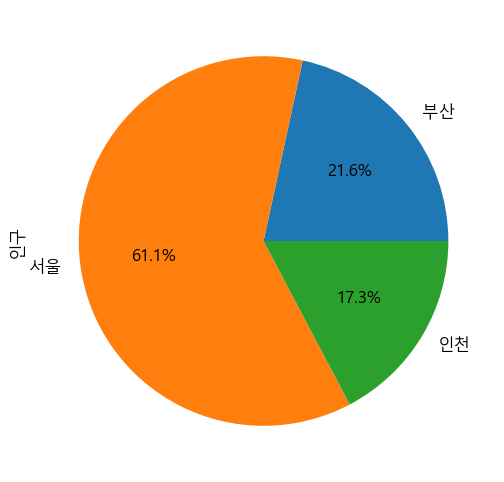

In [14]:
df_mean['인구'].plot.pie(autopct='%0.1f%%')
plt.show()
plt.close()

## #03. 산점도 그래프

### [1] 데이터 가져오기

In [15]:
df = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/04.데이터시각화/수업/수업데이터/traffic_acc.xlsx')
df

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### [2] 추세선을 위한 회귀식 구하기

In [26]:
x = df['발생건수']
z = np.polyfit(x, df['부상자수'], 1)
f = np.poly1d(z)
y = f(x)
y

array([24255.39254637, 21095.45182744, 25780.59060004, 27517.8557864 ,
       29298.65793378, 27904.07076316, 28722.84651389, 29228.43702892,
       28840.81763406, 30242.42689517, 29360.45233006, 28482.69101925,
       23520.88188148, 22536.38479527, 26043.21678423, 27701.83455715,
       29375.90092913, 26981.36807323, 28665.2653719 , 28889.97226747,
       29590.77689802, 29319.72420524, 30410.95706684, 27095.12593911,
       23440.83004993, 23134.66690472, 28007.99770236, 27852.10729356,
       29550.0487732 , 28210.23390837, 27826.82776781, 27749.58477246,
       28485.49985544, 29215.79726604, 27515.04695021, 26217.3646283 ,
       23197.8657191 , 22404.36949412, 26022.15051277, 27069.84641336,
       29902.55771562, 28932.10481039, 29968.56536619, 28540.27216124,
       27807.16591445, 30479.77355361, 30017.7199996 , 28705.99349672,
       25713.17853137, 24266.62789114, 28089.453952  , 29394.1583644 ,
       30916.54758187, 29528.98250174, 30978.34197816, 30573.86956613,
      

### [3] 산점도 그래프 시각화

산점도 그래프는 데이터프레임에 대해 $x$축으로 사용될 변수와 $y$축으로 사용될 변수를 설정해야 한다.

추세선은 `pyplot` 객체를 활용하여 직접 구현해야 한다.

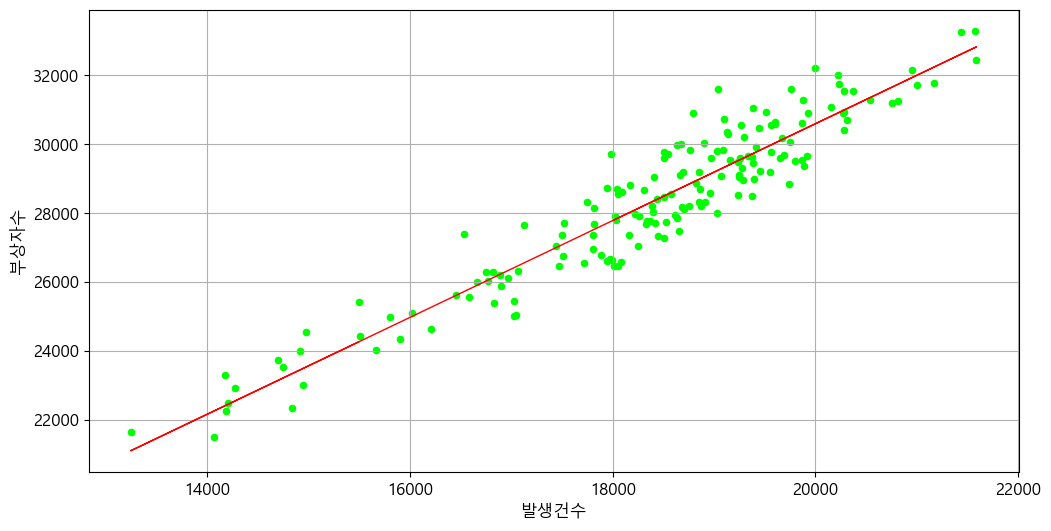

In [27]:
df.plot.scatter(x='발생건수', y='부상자수', color='#00ff00')
plt.plot(x,y,color='#ff0000', linewidth=1)
plt.grid()
plt.show()
plt.close()